In [2]:
pip install yfinance numpy scipy matplotlib mplfinance plotly


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 1.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/3.0 MB 3.8 MB/s eta 0:00:01
     ----- ---------------------------------- 0.4/3.0 MB 3.8 MB/s eta 0:00:01
     ------- -------------------------------- 0.5/3.0 MB 3.3 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 3.4 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/3.0 MB 3.5 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 4.1 MB/s eta 0:00:01
     ------------------- -------------------- 1.4/3.0 MB 4.1 MB/s eta 0:00:01
     --------------------- ------------------ 1.6/3.0 MB 4.0 MB/s eta 0:00:01
     ------------------------- -------------- 1.9/3.0 MB 4.2 MB/s eta 0:00:01
     --------------------------- ------------ 2.0/3.0 MB 4.1 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 4.0 MB/s eta 

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from datetime import datetime
import scipy.stats as stats

In [5]:
def fetch_options_data(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    options_dates = ticker.options
    # We'll use the nearest expiry date for our analysis
    options_data = ticker.option_chain(options_dates[0])
    return options_data.calls, options_data.puts

In [10]:
jpm_calls, jpm_puts = fetch_options_data('JPM')

In [12]:
yf.Ticker('JPM')

yfinance.Ticker object <JPM>

In [22]:
start_date = '2024-01-01'
end_date = '2024-09-27'
ticker = 'JPM'
stock_data = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


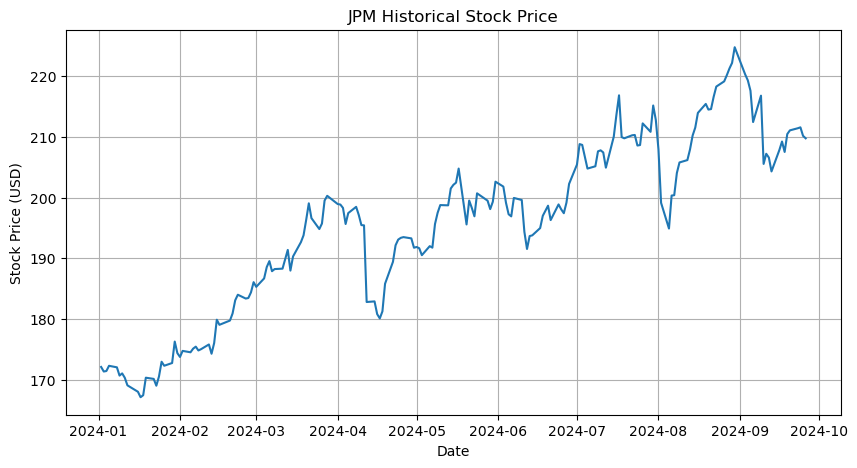

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'])
plt.title('JPM Historical Stock Price' )
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)

In [26]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,169.089996,172.169998,168.910004,172.080002,169.096588,9977400
2024-01-03,171.860001,172.039993,170.369995,171.330002,168.359604,9852300
2024-01-04,170.639999,173.350006,170.539993,171.410004,169.476852,11972500
2024-01-05,171.470001,173.380005,171.470001,172.270004,170.327164,10064200
2024-01-08,172.020004,172.360001,169.490005,172.020004,170.079987,11229900
...,...,...,...,...,...,...
2024-09-20,209.929993,211.419998,209.500000,211.089996,211.089996,20885000
2024-09-23,211.000000,211.800003,209.990005,211.440002,211.440002,7223500
2024-09-24,211.149994,212.949997,210.369995,211.589996,211.589996,7323200


In [36]:
tickers_list = ['JPM', 'MS', 'GS', 'C']
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker, start_date, end_date)['Adj Close']

data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,JPM,MS,GS,C
Date,,,,
2024-01-02,169.096588,91.316238,380.994415,51.589684
2024-01-03,168.359604,89.380989,374.606873,52.173275
2024-01-04,169.476852,89.614388,375.745087,52.299721
2024-01-05,170.327164,90.674385,379.169403,52.844410
2024-01-08,170.079987,90.936966,381.543884,52.533157
...,...,...,...,...
2024-09-20,211.089996,102.470001,498.429993,62.139999
2024-09-23,211.440002,102.470001,497.410004,62.580002
2024-09-24,211.589996,102.580002,498.019989,61.369999


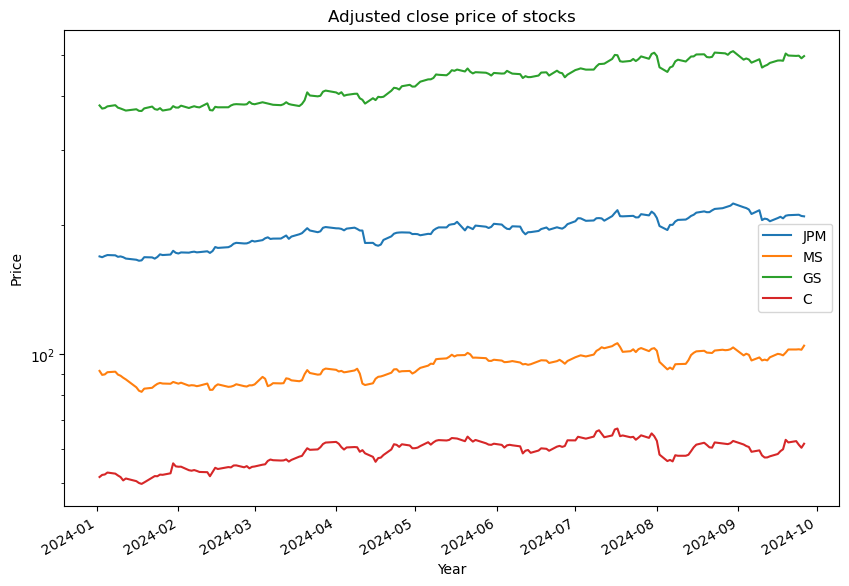

In [43]:
data.plot(figsize=(10,7))
plt.yscale("log")
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Adjusted close price of stocks')
plt.show()

[*********************100%***********************]  1 of 1 completed


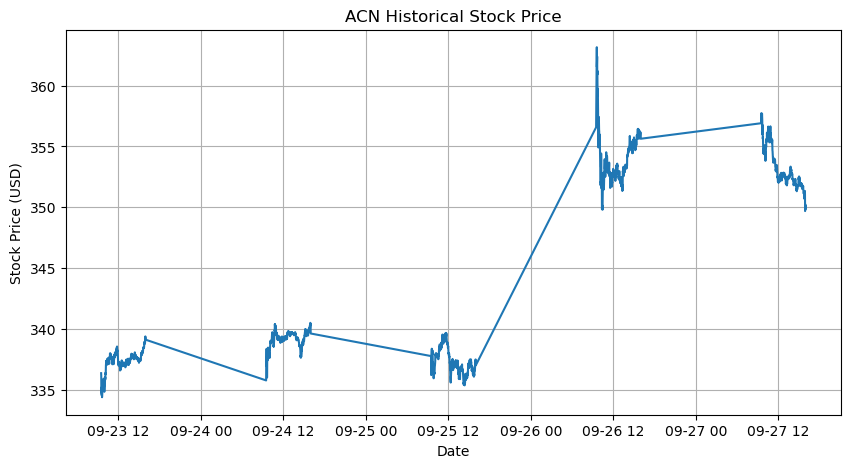

In [79]:
intraday_data = yf.download(tickers="ACN",
                            period="5d",
                            interval="1m",
                            auto_adjust=True)
intraday_data['Close']
plt.figure(figsize=(10, 5))
plt.plot(intraday_data['Close'])
plt.title('ACN Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)

In [10]:
class BS():
    def __init__(self, spot, strike, rate, days, volatility, multiplier=100):
        self.spot = spot
        self.strike = strike
        self.rate = rate
        self.days = days / 365
        self.volatility = volatility
        self.multiplier = multiplier
        
        self.d1 = (np.log(self.spot/self.strike) + \
                   (self.rate + 0.5*self.volatility**2)*(self.days)) \
            / (self.volatility*np.sqrt(self.days))
        self.d2 = self.d1 - self.volatility*np.sqrt(self.days)
        
        self.N_tag_d1 = (np.exp(-0.5*self.d1**2)) / (np.sqrt(2*np.pi))
        
        
    def call_price(self):
        a = self.spot*stats.norm.cdf(self.d1)
        b = self.strike*np.exp(-self.rate*self.days)*stats.norm.cdf(self.d2)
        return '{:,.2f}'.format(round(a-b,2)*self.multiplier)
    
    def put_price(self):
        a = self.strike*np.exp(-self.rate*self.days)*stats.norm.cdf(-self.d2)
        b = self.spot*stats.norm.cdf(-self.d1)
        return '{:,.2f}'.format(round(a-b,2)*self.multiplier)

def calculate_historial_volatility(stock_data, window=252):
    log_returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    volatility = np.sqrt(window) * log_returns.std()
    return volatility

class BSGreeks(BS):
    def delta_call(self):
        return si.norm.cdf(self.d1(), 0.0, 1.0)

    def delta_put(self):
        return -si.norm.cdf(-self.d1(), 0.0, 1.0)
    
    def gamma(self):
        return si.norm.pdf(self.d1(), 0.0, 1.0) / (self.spot * self.volatility * np.sqrt(self.days))

    def theta_call(self):
        return (-self.spot * si.norm.pdf(self.d1(), 0.0, 1.0) * self.volatility / (2 * np.sqrt(self.days)) - self.rate * self.strike * np.exp(-self.rate * self.days) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def theta_put(self):
        return (-self.S * si.norm.pdf(self.d1(), 0.0, 1.0) * self.volatility / (2 * np.sqrt(self.days)) + self.rate * self.strike * np.exp(-self.rate * self.days) * si.norm.cdf(-self.d2(), 0.0, 1.0))

    def vega(self):
        return self.spot * si.norm.pdf(self.d1(), 0.0, 1.0) * np.sqrt(self.days)
    
    def rho_call(self):
        return self.strike * self.days * np.exp(-self.rate * self.days) * si.norm.cdf(self.d2(), 0.0, 1.0)
    
    def rho_put(self):
        return -self.strike * self.days * np.exp(-self.rate * self.days) * si.norm.cdf(-self.d2(), 0.0, 1.0)

spot = 300
strike = 250
days = 365
volatility = 0.15
rate = 0.03

In [15]:
import numpy as np
from scipy import stats

class BS():
    def __init__(self, spot, strike, rate, days, volatility, multiplier=100):
        self.spot = spot
        self.strike = strike
        self.rate = rate
        self.days = days / 365
        self.volatility = volatility
        self.multiplier = multiplier
        
        self.d1 = (np.log(self.spot / self.strike) + 
                   (self.rate + 0.5 * self.volatility ** 2) * (self.days)) \
            / (self.volatility * np.sqrt(self.days))
        self.d2 = self.d1 - self.volatility * np.sqrt(self.days)
        
    def call_price(self):
        a = self.spot * stats.norm.cdf(self.d1)
        b = self.strike * np.exp(-self.rate * self.days) * stats.norm.cdf(self.d2)
        return '{:,.2f}'.format(round(a - b, 2) * self.multiplier)
    
    def put_price(self):
        a = self.strike * np.exp(-self.rate * self.days) * stats.norm.cdf(-self.d2)
        b = self.spot * stats.norm.cdf(-self.d1)
        return '{:,.2f}'.format(round(a - b, 2) * self.multiplier)

class BSGreeks(BS):
    def delta_call(self):
        return stats.norm.cdf(self.d1)

    def delta_put(self):
        return -stats.norm.cdf(-self.d1)
    
    def gamma(self):
        return stats.norm.pdf(self.d1) / (self.spot * self.volatility * np.sqrt(self.days))

    def theta_call(self):
        return (-self.spot * stats.norm.pdf(self.d1) * self.volatility / (2 * np.sqrt(self.days)) 
                - self.rate * self.strike * np.exp(-self.rate * self.days) * stats.norm.cdf(self.d2))
    
    def theta_put(self):
        return (-self.spot * stats.norm.pdf(self.d1) * self.volatility / (2 * np.sqrt(self.days)) 
                + self.rate * self.strike * np.exp(-self.rate * self.days) * stats.norm.cdf(-self.d2))

    def vega(self):
        return self.spot * stats.norm.pdf(self.d1) * np.sqrt(self.days)
    
    def rho_call(self):
        return self.strike * self.days * np.exp(-self.rate * self.days) * stats.norm.cdf(self.d2)
    
    def rho_put(self):
        return -self.strike * self.days * np.exp(-self.rate * self.days) * stats.norm.cdf(-self.d2)

# Parameters
spot = 300
strike = 250
days = 365
volatility = 0.15
rate = 0.03

# Instantiate the BSGreeks class
option_price = BS(spot, strike, rate, days, volatility)
option_greeks = BSGreeks(spot, strike, rate, days, volatility)

# Print the value for rho_put
print("call price:", option_price.call_price())
print("call delta:", option_greeks.delta_call())
print("call gamma:", option_greeks.gamma())
print("call theta:", option_greeks.theta_call())
print("call vega:", option_greeks.vega())
print("call rho:", option_greeks.rho_call())

print("put price:", option_price.put_price())
print("put delta:", option_greeks.delta_put())
print("put gamma:", option_greeks.gamma())
print("put theta:", option_greeks.theta_put())
print("put vega:", option_greeks.vega())
print("put rho:", option_greeks.rho_put())

call price: 5,882.00
call delta: 0.9319505761425017
call gamma: 0.0029194444599397696
call theta: -9.578899656861736
call vega: 39.41250020918689
call rho: 220.7654047057573
put price: 143.00
put delta: -0.06804942385749836
put gamma: 0.0029194444599397696
put theta: -2.300558155247925
put vega: 39.41250020918689
put rho: -21.845978681369726


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NKE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (15m 2024-06-27 -> 2024-10-01 21:52:35-04:00) (Yahoo error = "15m data not available for startTime=1719460800 and endTime=1727833955. The requested range must be within the last 60 days.")')


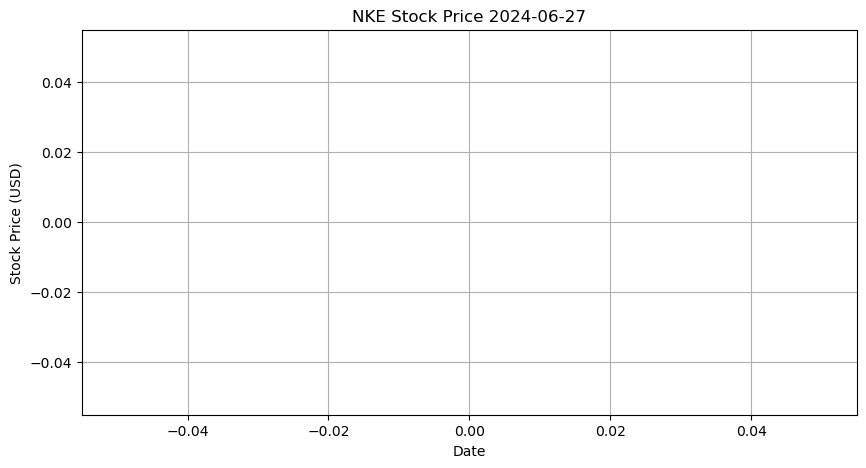

In [141]:
intraday_data = yf.download(tickers="NKE",
                            start="2024-06-27",
                            period="1d",
                            interval="15m",
                            auto_adjust=True)
intraday_data['Close']
plt.figure(figsize=(10, 5))
plt.plot(intraday_data['Close'])
plt.title('NKE Stock Price 2024-06-27')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)

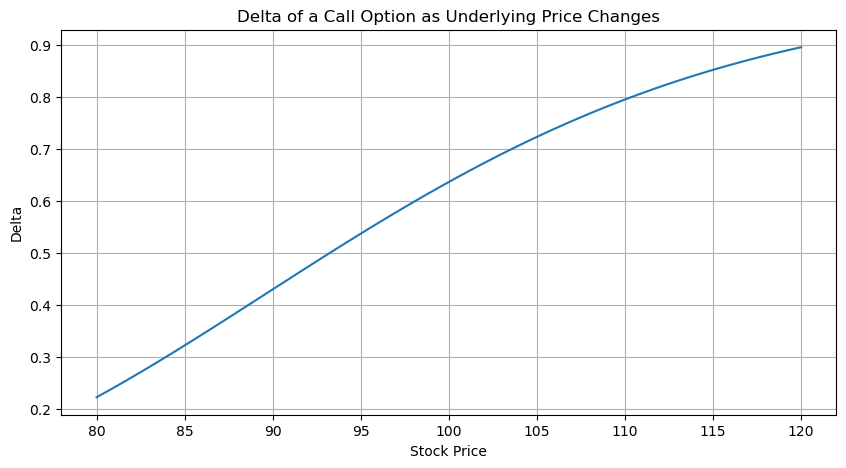

In [21]:
stock_prices = np.linspace(80, 120, 100)
deltas = [BSGreeks(spot=price, strike=100, days=365, rate=0.05, volatility=0.2).delta_call() for price in stock_prices]
plt.figure(figsize=(10, 5))
plt.plot(stock_prices, deltas)
plt.title('Delta of a Call Option as Underlying Price Changes')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.grid(True)

In [31]:
ticker = yf.Ticker("AAPL")

# Available expiration dates
expiration_dates = ticker.options

# Option chain
opt = ticker.option_chain(expiration_dates[0])

#Calls and puts
calls = opt.calls
puts = opt.puts

In [56]:
def get_option_data(stock_symbol, expiration_date, option_type, strike):
    
    stock = yf.Ticker(stock_symbol)
    option_chain = stock.option_chain(expiration_date)
    options = getattr(option_chain, "calls" if option_type.startswith("call") else "puts")
    option_data = options[options["strike"] == strike]
    return option_data

# Example: Retrieving call option data for AAPL expiring on 2024-03-16 with a strike price of $150
aapl_call_data = get_option_data(
    "AAPL", "2024-10-11", "call", 150
)
# Accessing specific data points like bid price and implied volatility
aapl_call_bid_price = aapl_call_data["bid"]
aapl_call_implied_volatility = aapl_call_data["impliedVolatility"]

aapl_call_bid_price

4    0.0
Name: bid, dtype: float64

In [66]:
import yoptions as yo
chain = yo.get_chain_greeks(stock_ticker='AAPL', dividend_yield=0, option_type='c', risk_free_rate=None)
print(chain.head().to_string())

HTTPError: HTTP Error 401: Unauthorized